# [Procesos Estocasticos EE-05](https://github.com/PCL-AI/EE-05)  
# Laboratorio 02
Aplicaciones de procesos estocasticos entre formulas teoricas y resultados experimentales


#1 Aguja del Buffon

El problema de la aguja del Buffon es una pregunta planteada por primera vez en el siglo XVIII por Georges-Louis Leclerc.

Supongamos que tenemos un piso con tiras paralelas, cada una del mismo ancho, y dejamos caer una aguja en el piso. ¿Cuál es la probabilidad de que la aguja se extienda a través de una línea entre dos tiras?

La solucion en el caso de que la longitud de la aguja no sea mayor que el ancho de las tiras, se puede calcular experimentalmente y aproximar el número $\pi$, aunque esa no fue la motivación original para la pregunta de del Buffon.

El program toma 

1. L (longitud de la aguja),
2. D = distancia entre lineas y 
3. N = número de intentos,
4. Generar número aleatorio 'd' entre 0 y D
5. Generar theta entre 0 y pi / 2
6. Devuelve la probabilidad de interceptar la línea 
 


In [0]:
import random 
from numpy import pi, sin

def buffon(L, D, N):

    inter = 0; 
    for loop in range(N) :
        theta = pi*random.random()/2
        x     = D*random.random()/2
        if L * sin(theta)/2 > x: # d = random*D
            inter += 1
    return inter/N

# Prob_inter = 2*L/(D*pi) ==>  Pi_est = 2*L / (P_inter*D); 
L = 1
D = 4
N = int(1e8) 
Pi_est = 2*L / (buffon(L,D,N)*D)

print(Pi_est)

3.1399534395144175


Otra forma de aproximar  $\pi$ es

In [0]:
import math, random

def isPointInCircle(x, y, Cx, Cy, radius):
    return math.sqrt((x - Cx)**2 + (y - Cy)**2) <= radius

def approximateCircleArea(radius, numberOfPoints):
    squareSide = radius*2
    Cx = radius
    Cy = radius

    pointsInside = 0
    for i in range(numberOfPoints):
        x = random.random()*squareSide
        y = random.random()*squareSide

        if (isPointInCircle(x, y, Cx, Cy, radius)):
            pointsInside = pointsInside + 1

    return pointsInside / numberOfPoints * squareSide**2


In [0]:
approximateCircleArea (1,10000)

3.1336

#2 Lanzamientos de moneda

Cuando se trata de cálculos de probabilidad, los lanzamientos de monedas están entre los eventos más fáciles de calcular. Considere una moneda justa (una moneda que produce caras y sellos con la misma probabilidad). Sea $ C $ el evento de obtener caras como resultado y $ S $ el evento de obtener sellos como resultado. Ahora calculamos $ P (C) $. 

$$ P (C) = P (C) $$ por una moneda regular.

También,

$$ P (C) + P (S) = 1 $$

Por los axiomas de probabilidad. Así,

$$ P (C) = \frac {1} {2} $$.

Ahora realizamos 10 simulaciones, cada una de las cuales simula 4000 lanzamientos de monedas y calcula la probabilidad empírica de obtener caras.

Nota: el codigo siguiente utiliza '1' para representar caras y '0' para representar sellos.

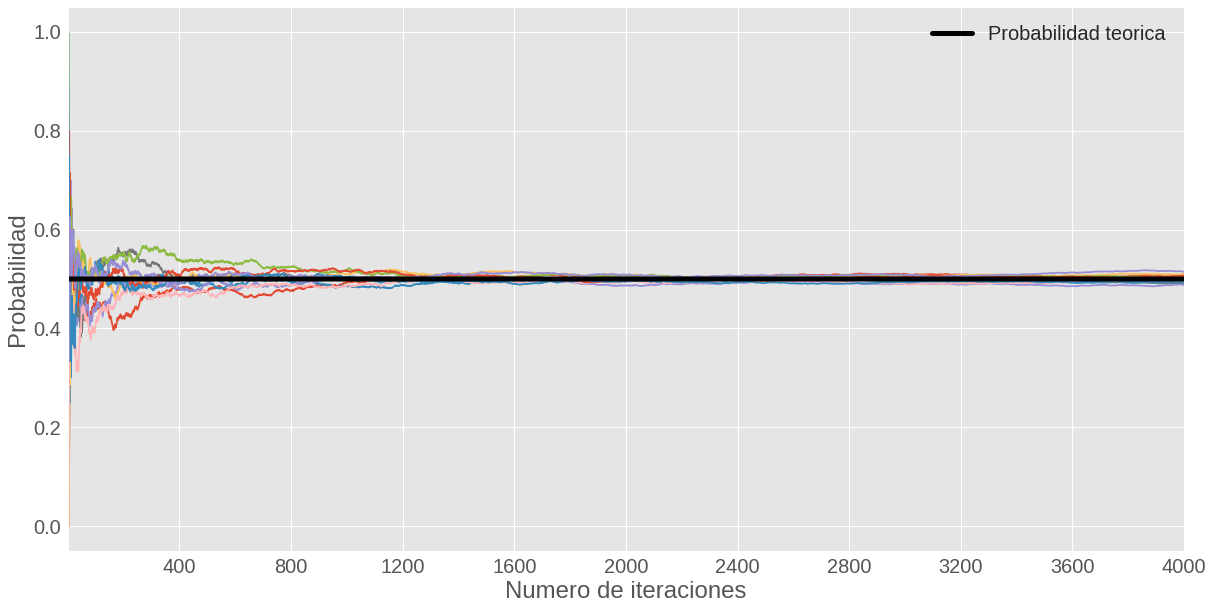

In [0]:
import matplotlib.pyplot as plt
import numpy as np
for simulations in range(0, 10):
    count = 0
    tiros = np.random.randint(2, size=4000)
    P_caras = []
    
    for i in range(1, 4001):
        index1 = [j for j in range(0, i) if tiros[j] == 1]
        P_caras.append(len(index1) / i)
        
    plt.xlabel('Numero de iteraciones', fontsize=24)
    plt.ylabel('Probabilidad', fontsize=24)
    plt.plot(np.arange(1, 4001), P_caras[0:4000])
    plt.gcf().set_size_inches(20, 10)
    plt.gca().set_xlim([1, 4000])
    plt.xticks(np.arange(400, 4001, 400), fontsize=20)
    plt.yticks(fontsize=20)
plt.plot(range(0, 4000), [1 / 2] * 4000, 'k', linewidth=5.0, label = 'Probabilidad teorica')
plt.legend(fontsize=20)
plt.show()

#3 La paradoja de los cumpleaños

$n$ personas se encuentran viajando en un tren y se preguntan: ¿Cuál es la probabilidad de que cada persona haya nacido en días diferentes? Sin considerar los años con más de 365 días, asumir que cada persona tiene igual probabilidad de nacer en cualquier día del año independientemente de los demás.

Por ejemplo, en un grupo de solo 4 personas, ¿qué tan probable es que todos tengan un cumpleaños único?  Puedes pensar que es muy probable todos tengan diferentes porque hay $365$ días en un año y, en términos generales,  $365$ es "mucho mayor" que $4$. De hecho, como verá, esta probabilidad es superior a $0.9$. Sin embargo, en un grupo de $25$ o más, ¿cuál es la probabilidad de que dos personas no tengan el mismo cumpleaños? Tal vez te sorprenda saber que la respuesta es menos de la mitad. Esto se conoce como la "paradoja del cumpleaños".

En general, para un grupo de $n$ personas, la probabilidad de que dos personas no compartan el mismo cumpleaños se puede calcular de la siguiente manera:

\begin{align*}
P &= \frac{\text{Numero de  } n \text{-permutationes de cumpleaños}}{\text{ Numero total de asignaciones de cumpleaños permitiendo cumpleaños repetidos}}\\
&= \frac{365!/(365-n)!}{365^n}\\
&= \prod_{k=1}^n \frac{365-k+1}{365}
\end{align*}

Observe que este valor disminuye con $ n $. En $ n = 24 $, este valor va por debajo de la mitad. La siguiente parte simula este evento y compara las probabilidades empíricas y teóricas asociadas. 


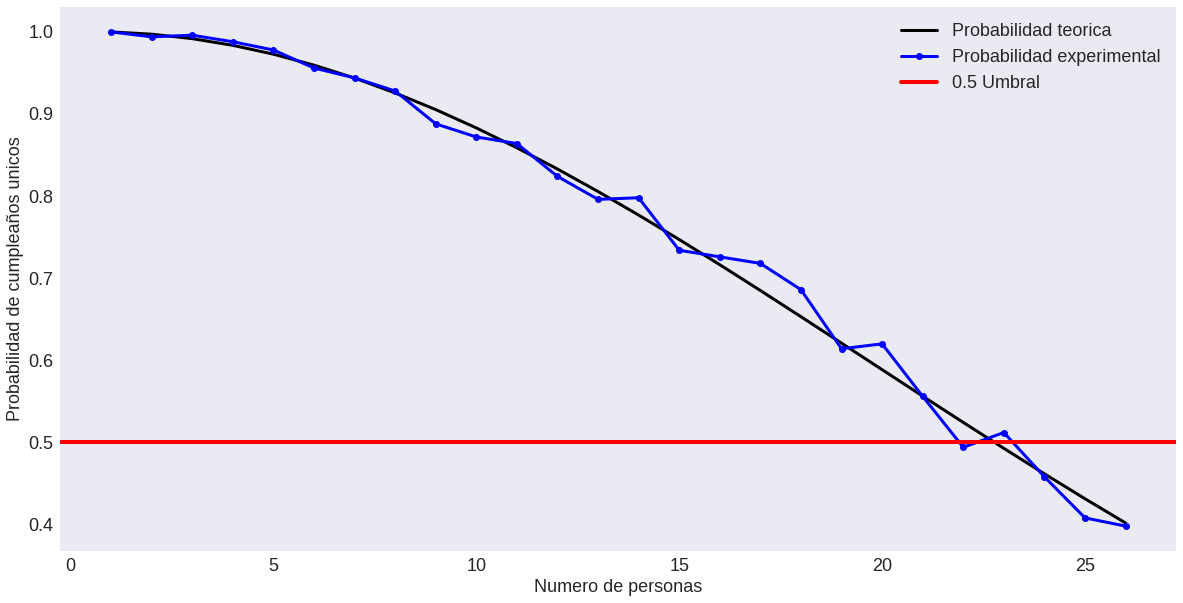

In [0]:
import itertools
import random

import matplotlib.pyplot as plt
import numpy as np

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


# Rango del numero de personas
PEOPLE = np.arange(1, 27)

# Numero de dias en un años 
DAYS = 365


def prob_unique_birthdays(num_people):
    '''
     Devuelve la probabilidad de que todos los cumpleaños sean unicos, entre un determinado
     Número de personas con cumpleaños distribuidos uniformemente.
    '''
    return (np.arange(DAYS, DAYS - num_people, -1) / DAYS).prod()


def sample_unique_birthdays(num_people):
    '''
     Selecciona una muestra de personas con cumpleaños distribuidos uniformemente, y
     devuelve verdad si todos los cumpleaños son unicos (o Falso de lo contrario).
    '''
    bdays = np.random.randint(0, DAYS, size=num_people)
    unique_bdays = np.unique(bdays)
    return len(bdays) == len(unique_bdays)


def plot_probs(iterations):
    '''
    Grafica una comparacion de la probabilidad de que un grupo de personas tengan todas
     Cumpleaños unicos, entre las probabilidades teoricas y experimentales.
    '''
    sample_prob = []  # Probabilidad experimental
    prob = []         # Probabilidad teorica
    
    # Calcular
    np.random.seed(1)
    for num_people in PEOPLE:
        unique_count = sum(sample_unique_birthdays(num_people)
                          for i in range(iterations))
        sample_prob.append(unique_count / iterations)
        prob.append(prob_unique_birthdays(num_people))
    
    # Graficar 
    plt.plot(PEOPLE, prob, 'k-', linewidth = 3.0, label='Probabilidad teorica')
    plt.plot(PEOPLE, sample_prob, 'bo-', linewidth = 3.0, label='Probabilidad experimental')
    plt.gcf().set_size_inches(20, 10)
    plt.axhline(0.5, color='red', linewidth = 4.0, label='0.5 Umbral')
    plt.xlabel('Numero de personas', fontsize = 18)
    plt.ylabel('Probabilidad de cumpleaños unicos', fontsize = 18)
    plt.grid()
    plt.xticks(fontsize = 18)
    plt.yticks(fontsize = 18)
    plt.legend(fontsize = 18)
    plt.show()

    
interact(plot_probs,
        iterations=widgets.IntSlider(min=50, value = 500, max=5050, step=200000),
        continuous_update=False, layout='bottom');

# 4 Estimando la longitud de un palito de fosforo después de n rupturas 
#(Problema del Examen Parcial 2018-II)
Se rompe un palito de fósforo en un punto que se elige de forma aleatoria y uniforme a lo largo de su longitud L. Se desecha la pieza de la izquierda y se rompe nuevamente la pieza de la derecha en un punto que es aleatorio y uniforme sobre su longitud nueva. Se continúa este proceso infinitas veces. 
¿Cuál es la probabilidad de que una de las piezas desechadas sea más de la mitad del fósforo original?
¿Cuál es el valor esperado de la longitud que nos queda después de romper dos veces el palito de fósforo?
¿Cuál es la varianza de la longitud que nos queda después de romper dos veces el palito de fósforo?


##Solucion teorica:
Suponiendo que cada ruptura es una variable aleatoria continua uniforme. Cada ruptura posterior se realiza en el palito desde 0 hasta el punto anterior y también es una r.v. continua uniforme.

Ejemplo con tres pausas:
- Ruptura  1 en [0, 1]: 0.51
- Ruptura  2 en [0, 0.42]: .12
- Ruptura  3 en [0, 0.11]: .045

Como resultado, el valor esperado de la longitud del stick después de la ruptura n puede ser modelado por:
$$ E[\text{longitud después de n rupturas}] = \left(\frac{1}{2}\right)^n.$$

Esto fue demostrado en clase y esto coincide con la intuición de las variables aleatorias uniformes donde, después de una ruptura, esperamos que la longitud promedio sea 1/2 y continúe desde este punto.

##Resultado Numerico
En esta parte obtendremos este resultado desde un enfoque numérico.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 10, 10
plt.rcParams["font.size"] = "20"

Las siguientes funciones manejan la ruptura del palito de fosforo y grafica la longitud en función del número de ruptura.

In [0]:
def romper_palito(longitud):
    return np.random.uniform(low=0, high=longitud)

def romper_palito_n_times(longitud, n):
    actual_longitud = longitud
    breaks = [] 
    for i in range(n):
        breaks.append(actual_longitud)
        actual_longitud = romper_palito(actual_longitud)
    return breaks

def romper_m_palito_n_times(longitud, n, m):
    sticks = []
    for i in range(m):
        sticks.append(romper_palito_n_times(longitud, n))
    return sticks

def plot_stick(breaks):
    plt.plot(np.arange(len(breaks)), breaks)
    
def plot_all_sticks(sticks):
    for stick in sticks:
        plot_stick(stick)
    plt.xlabel('Numero de ruptura')
    plt.ylabel('Longitud del palito')
    plt.title('Proceso de ruptura')
    plt.show()

Ahora podemos hacer algunas rupturas y trazar los resultados.



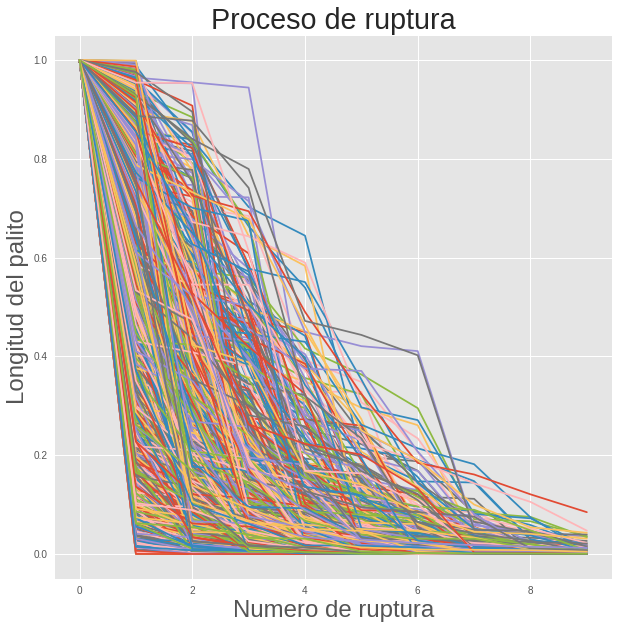

In [0]:
longitud = 1
numero_rupturas = 10
numero_palos  = 1000
result = np.asarray(romper_m_palito_n_times(longitud, numero_rupturas, numero_palos))
plot_all_sticks(result)

Ahora la parte interesante es tomar la longitud promedio de los palitos de fosforo en cada ruptura y graficarlo junto al modelo modelo matemático obtenido en clase
$$y = \left(\frac{1}{2}\right)^x$$

In [0]:
def plot_average_stick(sticks):
    if type(sticks) != np.ndarray:
        sticks = np.asarray(sticks)
    averages = []
    num_breaks = sticks[0].shape[0]
    for i in range(num_breaks):
        averages.append(sticks[:,i].mean())
    plt.plot(np.arange(num_breaks), averages, 'g-.', linewidth=5, alpha=1, label='Average Stick Break')
    x = np.arange(0,9,.01)
    plt.plot(x, (1/2)**x, 'm--', linewidth=5, alpha=.5, label='y=.5^x')
    plt.legend()
    plt.xlabel('Numero de ruptura')
    plt.ylabel('Longitud del palito')
    plt.title('Ruptura promedio e $Y = (1/2)^x$')
    plt.show()
    return averages
  

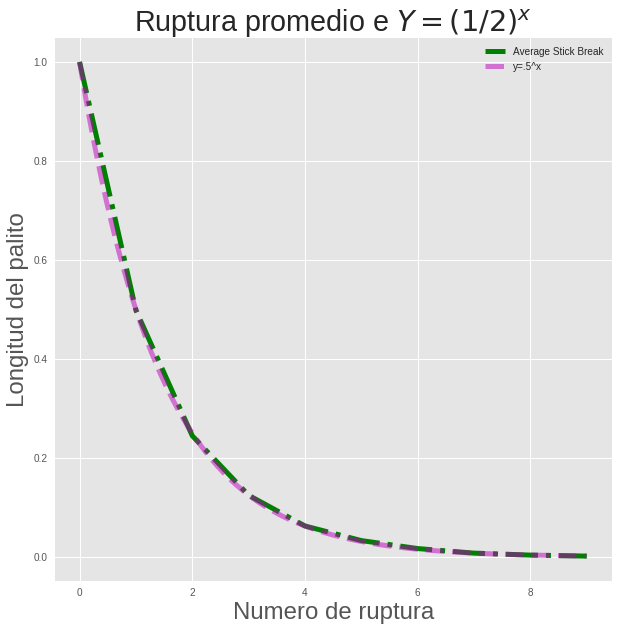

In [0]:
averages = plot_average_stick(result)

Podemos cuantificar la precision con el porcentaje de error.

In [0]:
def get_percent_error(averages):
    errors = []
    for i in range(len(averages)):
        errors.append(100*abs(averages[i]-(.5**i))/(.5**i))
    return np.asarray(errors)

In [0]:

errors = get_percent_error(averages)
print('La diferencia promedio de la predicción y el modelo es {:.3f}%'.format(errors.mean()))


La diferencia promedio de la predicción y el modelo es 3.118%
